# **GeoMapCLIP Demo:** Worldwide Map Image Geo-localization 🌎📍

This notebook evaluates how coordinate inference results differ between GeoCLIP and our model, `GeoMapCLIP`. Both models predict the center coordinates of a given image. 
GeoCLIP was developed to predict the GPS location of natural images. Our GeoMapCLIP is a fine-tuned GeoCLIP that predicts the coordinates of map images.
The main differences are:
1. GeoCLIP was pre-trained on natural images, such as those from Twitter.
2. GeoMapCLIP (Our model) was fine-tuned with map tiles using GeoCLIP as a base.
3. By comparing these two predictions, we assess how map-specific fine-tuning improves coordinate inference for geospatial imagery.


### Objectives 
In this notebook, we will cover the full workflow for GeoMapCLIP, a map processing vision model to geolocate and find the GPS coordinates of a tile, from data preparation to model training, including:

1. **Data Description and Data Processing**: Steps for downloading the data and partitioning it to fine-tune our GeoMapCLIP model.
2. **Example Usage and Results**: A demonstration of loading GeoMapCLIP and doing some inference using them, showcasing our model’s ability to learn patterns in the legacy data and find the corresponding latitude and longitude for the given map image.
3. **Conclusion, Future Works, and Limitations**: We will discuss the current state and achievements and the future steps to improve our model.


### Want to learn more? Check out repositories
|Model | GitHub repo   | Paper | 
|--------|------|-----|
|GeoCLIP | [VicenteVivan/geo-clip](https://github.com/VicenteVivan/geo-clip)| [paper](https://arxiv.org/abs/2309.16020v2)| 
|GeoMapCLIP (Ours)  | [junghawoo/geomap-clip](https://github.com/junghawoo/geomap-clip) | NA| 

# Table of Contents
1. [Introduction](#Introduction)
2. [Data Description](#Data-Description)
3. [Predictions](#Predictions)
4. [Visualization of some best and worst predictions](#Visualization)
5. [Discussion](#Discussion)
6. [Conclusion](#Conclusion)

## Introduction

Imagine an archaeologist trying to find lost ruins described only in old maps—no coordinates, just sketches and faded labels- and matching them to real-world locations is painstaking and uncertain. Tons of traditional data exist in archaeological reports, field notes, and sketch maps that remain underutilized due to the challenges of digitization and integration. These legacy datasets contain valuable historical and spatial information, but extracting geospatial details—such as site locations described textually or in hand-drawn maps—is labor-intensive and limits scalability. 
Analyzing old maps provides spatial and temporal insights that guide decision-making and long-term strategies, and an AI system that directly predicts coordinates from such maps could change everything. Moreover, Geolocation data extracted from maps is essential for various applications, including:
Urban planning: Revealing patterns of past city growth to inform future infrastructure development.


1. Agricultural monitoring: Tracking historical changes in land use and crop patterns over time.
2. Disaster management: Understanding past disaster impacts and geographic vulnerabilities to support preparedness.
3. Hydrological studies: Examining old maps to trace lake and river migrations, aiding long-term water resource planning.
4. Mineral exploration: Using historic geospatial data to locate explored/unexplored mineral sites.

Prior work on map-based geolocation predominantly follows one of several approaches: 1. They extract and process the textual labels on the map pictures instead of processing map images. 2. Geolocation extraction for daily mobile-taken images by extracting famous landmarks and locations from these images. 3. Map images are processed by extracting roads, buildings, and farms, which need detailed images and cannot generalize to all map images. 4. Solving map geolocation by searching in a big map database rather than directly inferring coordinates. In contrast, our approach adopts a vision transformer-based architecture that predicts geospatial coordinates directly from visual input without reliance on auxiliary databases or handcrafted feature engineering.
This project aims to develop a vision system capable of understanding map images and extracting central coordinates to describe map content. By fine-tuning models like CLIP and image retrieval techniques, the system will interpret scales, symbols, and coordinates in geospatial maps, facilitating the automated extraction of spatial information. This advancement will enhance the capabilities of large language models in geospatial reasoning, aiding researchers in efficiently querying and utilizing legacy datasets.
Initial efforts will focus on fine-tuning GeoCLIP (Contrastive Language-Image Pretraining) to handle map-specific tasks. The vision system will output a list of coordinates for the input map figure. Our results show that, though a GeoCLIP works very well on real Twitter images and popular locations on the earth, our fine-tuned GeoMapCLIP outperforms it for the satellite map pictures.  
The set of images used by GeoCLIP is more clustered on the tourist places and famous cities, so creating a GPS gallery from the Twitter image locations could show higher accuracy rates than our 

### Why GeoMapCLIP? 
- **GeoMapCLIP**:
    - `GeoMapCLIP` does not assume the distribution of the GPS coordinates of the training set. Unlike Twitter images, our system may focus on geolocating less well-known areas. Despite the GeoCLIP model, our GeoMapCLIP model is fine-tuned with Satellite tiles for zoom levels 9 and 10. Moreover, it used Fibonacci lattice points as a GPS gallery, representing a list of valid GPS coordinates where an image can be categorized. Besides, our map/satellite images’ locations are evenly distributed, whereas GeoCLIP’s training dataset is clustered in well-known cities or tourist places. 
- **GeoCLIP**:
  - `GeoCLIP` is a CLIP-Inspired Alignment between Location and Images for Effective Worldwide Geo-localization for user-taken pictures collected from Twitter. At the same time, GeoMapCLIP is made by Fine-tuning GeoCLIP for map/satellite images to find the central coordinate of a given map tile. GeoMapCLIP aims to automate the analysis and geolocation of legacy data and prepare it for various research and applications. 

### Sample GPS coordinate predictions by GeoMapCLIP and GeoCLIP 
<img src="data/plots/GeoMapCLIP_GeoCLIP_z8_best3_visualization_plot.png" width="800" height="400">

## Data Description

The training data is not provided at this Jupyter notebook. Below is an outline of the training, validation, and test dataset we used.                                                                                                                                                                                  
- **Training set/validation set**
  - Trained with ArcGis zoom level 9 and 10 satellite tiles, and the validation set is randomly chosen 20% of the entire dataset. Typically, the training set is part of the entire dataset. For example, the 80:20 rule says that 80% of the total dataset should be used for training the model, and the rest should be used for validating the model. `GeoMapCLIP` is a classifier to find the center coordinate of a given map tile among a set of predefined GPS coordinates. Typically, in classification systems, the classifiers are trained with multiple pictures for each class.  For example, in animal classification, to determine whether a given picture belongs to a cat, the system must have seen at least one cat in the training phase. Therefore, we aimed to provide at least one tile for training to cover all of the earth's surface. In the future, we will enhance the model by utilizing multiple zoom levels/map layouts of satellite images for each GPS coordinate defined in the gps_gallery. 
- **Test set**
  -  We used 1,000 zoomed-out (zoom level 8) and zoomed-in (zoom level 11) images, respectively, to evaluate the performances on unseen data. We do not use Zoom levels 9 and 10 satellite images that have been used for training. Please refer to the Visualization and Discussion section for details.
- **Obtaining training dataset**
  - We have used `ArcGIS` map tiles to train and test our model. Since it is not allowed to upload and share their tiles, you can download them from the `ArcGIS` homepage, considering that you need their permission for bulk download. We will soon add the `OpenStreetMap` terrain tiles dataset as a separate data element as it is permitted to upload for non-commercial use. We saved tiles in Z/X/Y.png format in a directory where Z, X, and Y are Z is the zoom level, X is the tiles’ x index, and Y is the tile’s y index, as defined in Google’s Tile Map Service (ZXY). Please refer to https://docs.maptiler.com/google-maps-coordinates-tile-bounds-projection/ for more information on TMS.   
- **Data loading for fine-tuning**
 - `GeoMapCLIP` used the dataloader defined in `GeoCLIP`. Please refer to the geomapclip/train/dataloader.py. To load the training dataset, you have to create a CSV file containing three columns: IMG_FILE, LON, and LAT. Columns are for the image path, longitude, and latitude of the center of the image. Next, it resized the image to 224 pixels by 224 pixels and applied random color jitter and gray scale. Unlike natural images, we do not crop a random portion of an image and resize it, as these operations change the center coordinate of the image. We assume that user-provided map images are always upright, so we don’t apply a random horizontal flip. If the classification system deals with objects/animals pictures, flipping helps the system to stabilize its performance as there are many pictures taken from arbitrary angles.  We assume a map image’s top is always pointing to the north. 

                                                                                                                                                                                     
                                                                                                                                                                                      

In [1]:
import sys, os
import torch
import torch.nn as nn

## Installation 📦

all the requirements are included in the requirements.txt.
The current 'geoai' kernel includes all the necessary packages to run GeoMapCLIP, but if you want to install necessary libraries, please do "pip install -r requirements.txt" 

In [2]:
%pip install -q -U geomapclip


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -q geoclip

Note: you may need to restart the kernel to use updated packages.


## Model Loading 🛠️

## import libraries and GeoMapCLIP model Initialization 

In [4]:
from geomapclip import GeoMapCLIP

gmc_device = "cpu"

gmc_model = GeoMapCLIP().to(gmc_device)
print("===========================")
print("GeoMapCLIP has been loaded! 🎉")
print("===========================")


GeoMapCLIP has been loaded! 🎉


/Users/junghawoo/anaconda3/envs/tensorflow_m3/lib/python3.11/site-packages/geomapclip/model/location_encoder.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_s

## What is GeoCLIP ?

In [5]:
from geoclip import GeoCLIP

gc_model = GeoCLIP().to("cpu")
print("===========================")
print("GeoCLIP has been loaded! 🎉")
print("===========================")

#load pretrained weights by us (GeoMapCLIP)
# resuming from last epoch result
# saved weights could be either cpu or gpu. Whatever it is, load the same device type as model
#my_weights_folder = "/home/ubuntu/outputs/mix/04022025_ep15/weights"
my_weights_folder = "/Users/junghawoo/Documents/04112025_ep20_satellite/04112025_ep20/weights"
gmc_model.image_encoder.mlp.load_state_dict(torch.load(f"{my_weights_folder}/image_encoder_mlp_weights.pth", map_location=gmc_device))
gmc_model.location_encoder.load_state_dict(torch.load(f"{my_weights_folder}/location_encoder_weights.pth", map_location=gmc_device))
gmc_model.logit_scale = nn.Parameter(torch.load(f"{my_weights_folder}/logit_scale_weights.pth", map_location=gmc_device))


GeoCLIP has been loaded! 🎉


/Users/junghawoo/anaconda3/envs/tensorflow_m3/lib/python3.11/site-packages/geoclip/model/location_encoder.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_stat

In [6]:
# if the kernel does not have them, install these packages
%pip install -q matplotlib
%pip install -q folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Dataset or Data Loading 


Here are five satellite images randomly selected from our training set. 


### Uploading an Image 🌃

If you wish to upload your image, please add one to the file browser in Jupyter Notebook and update the image_path below as needed.

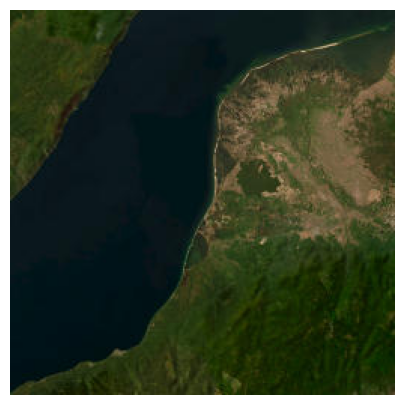

In [7]:
#upload your image and put the path here
# Image Upload & Display
from PIL import Image
import matplotlib.pyplot as plt

image_path = "data/z8_203_84.jpeg"  # Update with the path to your file

# Open the image file (replace with your local path)
image = Image.open(image_path)

# Show Image
image = Image.open(image_path)
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.show()

### Predictions 🗺️📍

- **How GeoMapCLIP finds the center coordinates of a given image**:
  - GeoMapCLIP can be used to locate map images (it gets a map image as input and provides the latitude and longitude of the center of the image), which is called geo-location of the map tiles. At the training stage, an embedding for a given image and another embedding for GPS coordinates of the latitude and longitude corresponding to the center of the image are learned, aiming to put them as close as possible in the same embedding space using contrastive loss minimization. It repeats this process for all training sets (image and its corresponding GPS coordinates).
  - The key is that image and GPS use the shared embedding space. Although the 512-dimensional embedding space is continuous, the inference must choose the predicted GPS coordinate from the GPS gallery (a predefined set of coordinates called Fibonacci points). Therefore, GeoMapCLIP is a `classification` model. The granularity of the predicted coordinates depends on the granularity of the Fibonacci points. 

### Let's run both models (GeoMapCLIP and GeoCLIP) using the uploaded map image.

#### GeoMapCLIP 

In [8]:
#Make predictions for GeoMapClip  
GM_top_pred_gps, GM_top_pred_prob = gmc_model.predict(image_path, top_k=50)

# Display the top 5 GPS predictions
print("Top 5 GPS Predictions by GeoMapCLIP 📍")
print("========================")
for i in range(5):
    lat, lon = GM_top_pred_gps[i]
    print(f"Prediction {i+1}: ({lat:.6f}, {lon:.6f}) - Probability: {GM_top_pred_prob[i]:.6f}")

Top 5 GPS Predictions by GeoMapCLIP 📍
Prediction 1: (52.219334, 106.319962) - Probability: 0.193010
Prediction 2: (52.262936, 107.010941) - Probability: 0.100940
Prediction 3: (51.921619, 106.219147) - Probability: 0.085553
Prediction 4: (52.333580, 106.583893) - Probability: 0.078043
Prediction 5: (52.035103, 106.483078) - Probability: 0.050630


`GeoMapCLIP` predicts the GPS location to be `(51.944263, 106.347656)` with a probability of 23%, and `(51.727028, 105.996094)` with a probability of 17.8%. To see the complete list of the top 50 locations, change `range(5)` to `range(50)`.

#### GeoCLIP

In [9]:
# Make predictions
top_pred_gps, top_pred_prob = gc_model.predict(image_path, top_k=50)

# Display the top 5 GPS predictions
print("Top 5 GPS Predictions by GeoCLIP 📍")
print("========================")
for i in range(5):
    lat, lon = top_pred_gps[i]
    print(f"Prediction {i+1}: ({lat:.6f}, {lon:.6f}) - Probability: {top_pred_prob[i]:.6f}")

Top 5 GPS Predictions by GeoCLIP 📍
Prediction 1: (41.700794, 41.717663) - Probability: 0.028077
Prediction 2: (49.011074, -123.122192) - Probability: 0.017021
Prediction 3: (49.205933, -123.264023) - Probability: 0.015607
Prediction 4: (49.008598, -123.134079) - Probability: 0.013462
Prediction 5: (49.006798, -123.132706) - Probability: 0.013176


`GeoCLIP` predicts the GPS location to be `(41.700794, 41.717663) ` with a probability of 2.8%, and `(49.011074, -123.122192)` with a probability of 1.7%. To see the complete list of the top 50 locations, change `range(5)` to `range(50)`.

### Accuracy of the prediction

We will now run both GeoMapCLIP and GeoCLIP to compare their GPS predictions. Each model generates a list of candidate GPS locations, each with an associated probability.

To visualize the results, we will plot the top 10 most probable locations predicted by each model on a map:

- **Orange circles** indicate locations where GeoCLIP assigns a higher probability.

- **Dark blue circles** indicate locations favored by GeoMapCLIP.

- The **most probable location from GeoCLIP** will be marked with an **orange pin**.

- The **most probable location from GeoMapCLIP** will be marked with a **blue pin**.

Let’s run the models and see how their predictions compare!



### Visualize Heatmap 🌎 🔍

In [10]:
# Heatmap
import folium
from folium.plugins import HeatMap

# Set top coordinates to plot the heatmap (<= top_k)
top_n_coordinates = 10

gps_coordinates = top_pred_gps.tolist()[:top_n_coordinates]
probabilities = top_pred_prob.tolist()[:top_n_coordinates]

total_prob = sum(probabilities)
normalized_probs = [prob / total_prob for prob in probabilities]

# Combine coordinates with normalized probabilities
weighted_coordinates = [(lat, lon, weight) for (lat, lon), weight in zip(gps_coordinates, normalized_probs)]

# Calculate the average location to center the map
avg_lat = sum(lat for lat, lon, weight in weighted_coordinates) / len(weighted_coordinates)
avg_lon = sum(lon for lat, lon, weight in weighted_coordinates) / len(weighted_coordinates)

# Create a map centered around the average coordinates
m = None
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=5)

# Define the color gradient
magma = {
    0.0: '#932667', # maroon
    0.2: '#b5367a', # shade of purple
    0.4: '#d3466b', # moderate pink
    0.6: '#f1605d',
    0.8: '#fd9668', # orange
    1.0: '#fcfdbf'  # light yellow
}


gradient = {str(k): v for k, v in magma.items()}

HeatMap(weighted_coordinates, gradient=gradient).add_to(m)

# Mark top coordinate
top_coordinate = gps_coordinates[0]
top_probability = normalized_probs[0]

folium.Marker(
    location=top_coordinate,
    popup=f"Top Prediction: {top_coordinate} with probability {top_probability:.4f}",
    icon=folium.Icon(color='orange', icon='star')
).add_to(m)


############################################ Draw result for GeoMapClip################################
GM_gps_coordinates = GM_top_pred_gps.tolist()[:top_n_coordinates]
probabilities = GM_top_pred_prob.tolist()[:top_n_coordinates]

total_prob = sum(probabilities)
normalized_probs = [prob / total_prob for prob in probabilities]

# Combine coordinates with normalized probabilities
weighted_coordinates = [(lat, lon, weight) for (lat, lon), weight in zip(GM_gps_coordinates, normalized_probs)]

# Define the bluish color gradient
bluish = {
    0.0: '#e6f7ff',   # Very pale blue
    0.2: '#cce6ff',  # Soft blue
    0.4: '#66ccff',  # Lighter blue
    0.6: '#99ccff',  # Very light blue
    0.8: '#336699',  # Light blue
    1.0: '#003366'  # Dark blue
}

gradient = {str(k): v for k, v in bluish.items()}

HeatMap(weighted_coordinates, gradient=gradient).add_to(m)

# Mark top coordinate
top_coordinate = GM_gps_coordinates[0]
top_probability = normalized_probs[0]

folium.Marker(
    location=top_coordinate,
    popup=f"Top Prediction: {top_coordinate} with probability {top_probability:.4f}",
    icon=folium.Icon(color='blue', icon='star')
).add_to(m)

# To increase the height of the map easily, set the width and height of the figure
figure = folium.Figure(width="100%", height=800)
figure.add_child(m)

# Display the map
m

If you used the provided map image, `z8_203_84.png`, the resulting heatmap would look like this.

You'll notice that `GeoMapCLIP` predictions tend to form tight clusters, whereas GeoCLIP predictions are more widely scattered across the globe.

Now, let's assess how accurate GeoMapCLIP's predictions are.


<img src="data/sample_outputs/GeoMapCLIP_sample_heatmap_z8_203_84.png" width="1000" height="400">

The following function returns the latitude and longitude of the center point of a tile. Since we used a map tile created at zoom level 8, with x index 203 and y index 84, we can call `tile_center_latlon(8, 203, 84)`.

In [11]:
import math

def tile_center_latlon(z, x, y):
    """
    Returns the center latitude and longitude of a tile at zoom level z and position (x, y).
    """
    n = 2.0 ** z
    lon_deg = (x + 0.5) / n * 360.0 - 180.0
    lat_rad = math.atan(math.sinh(math.pi * (1 - 2 * (y + 0.5) / n)))
    lat_deg = math.degrees(lat_rad)
    return  lat_deg,lon_deg


In [12]:
print(tile_center_latlon(8, 203,84)) 

(52.05249047600099, 106.171875)


### Google Map verification 

<img src="data/sample_outputs/GeoMapCLIP_google_map_verification.png" width="1000" height="400"> 
GeoMapCLIP accurately predicted the GPS location! 

## Visualization

### Tests with samples from zoom level 11:
The following plots show the best 10  and worst 10 predictions by GeoMapCLIP when we tested 1,000 sample images to get the center coordinates. The target image is the image you give to the GeoMapCLIP to find out its GPS coordinates, but you already know its coordinates. The predicted image is a tile that contains the GPS coordinate that GeoMapCLIP predicted (Note that GeoMapCLIP does not return an image, but the coordinates). GeoMapCLIP is a GPS classification system, but returned GPS coordinates must be one of the predefined list of coordinates. Next, we display the tiles closest to the predicted GPS location of the images to give readers an idea of the similarity of images.  

Note that sample images are unseen by the GeoMapCLIP. They are at zoom level 11, which is ¼ the size of level 10 images.  So, the GeoMapCLIP has to find the GPS coordinates of a much smaller region from the embedding space learned from zoom level 10. If you look into the images carefully, you will notice that the  Prediction image contains the Target image. 
Constrative learning tries to put an image’s encoding as close to its corresponding GPS coordinates as possible. Therefore, it is not guaranteed that a map tile will be mapped to its exact coordinates. In the best cases, GeoMapCLIP may return exact coordinates if the given image’s GPS coordinates are on the GPS gallery, i.e, the eligible list of GPS coordinates we prepared.  In the worst cases, GeoMapCLIP predicted coordinates in Antarctica when some images for Greenland, Ellesmer Island, and Baffin Island, Canada were given. Two of the worst predictions come from the sea tiles. Although sea tiles were excluded from the training set, some sea tiles were included due to the coarse granularity of the countries' Shapefile we used. One good piece of news from the Worst 10 predictions plot is that GeoMapCLIP found some images with similar patterns, either local or global: Prediction 5 image found two depression or hollow areas similar to those in Target 5 image. 
 - <img src="data/plots/GeoMapCLIP_z11_comp10_visualization_plot.png" width="1200" height="800">

### Tests with samples from zoom level 8:
If you compare Target images with Prediction images, a Target image covers a 16 times larger area than prediction images. So, if you carefully look into the Target image, you will see the prediction image is contained within it. For example, Target 2 in the left column contains the Prediction 2 image ( white lake-like feature) in the fourth quadrant.  Prediction 8 image is also at the top of the Target 8 image. 
 - <img src="data/plots/GeoMapCLIP_z8_comp10_visualization_plot.png" width="1200" height="800">

## Discussion

We’ve seen that predicting the GPS coordinates of a map image is possible with the use of the CLIP model and its variant, the GeoCLIP model. However, its accuracy is not yet satisfactory to be useable, since the model is not been trained for map images but the user-taken Twitter images. 
### Does fine-tuning improve GPS prediction for map images? Yes!

A comparison of prediction accuracy for GeoCLIP and `GeoMapCLIP` is given in the following table. GeoCLIP is not fine-tuned with map tiles, and its weights are the same as https://github.com/VicenteVivan/geo-clip. Our fine-tuned version, GeoMapCLIP, was trained with 262,144 satellite tiles (zoom level 9) and 1,048,576 satellite tiles ( zoom level 10).  We have also trained with terrain map images, but this was not included in this notebook as including more datasets degraded the performance.  

Unsurprisingly, `GeoMapCLIP` predicted the coordinates better for the satellite images, and it can correctly guess the given map image’s coordinates 8.3% of the time at a 40 km error threshold. This means if the predicted GPS is within 40km of the target ( ground truth GPS), we regard it a success or an accurate prediction.  You can see the accuracy for various distances in the following table, while the average distance error reduced from more than 8000 km in GeoCLIP to ~2000 km in `GeoMapCLIP`.


| Accuracy at error threshold ( in Kilometer) | GeoCLIP   |GeoMapCLIP (z8 tiles) | GeoMapCLIP (z11 tiles) |
|--------|------|-----|------|
|2500 km | 25.6%| 73.4%| 75.9%|
| 750 km | 7.9% | 41.0%| 34.5%|
|200 km | 1.1%| 25.8%| 14.6%|
| 100 km | 0.4% | 18.8%| 9.0%|
|40 km | 0.1%| 8.3%| 3.8%|
| 25 km | 0% | 4.3%| 2.3%|
| 1 km | 0%| 0%| 0%|
|Avg Distance Error | 8619 km | 1951 km| 2253 km|



### Visualization of the GeoMapCLIP errors distribution 

- These plots show the distribution of `1,000` randomly sampled map images based on their target locations (i.e., ground truth GPS coordinates). Each point is visualized as a square approximately 40 km by 40 km in size, with the color indicating the prediction error—refer to the colormap in the top right corner of the plot for details.

- Note that because we use the EPSG:3857 projection, tiles near the equator appear smaller than those at higher latitudes, even though they cover the same real-world distance.

- The first plot illustrates the spatial distribution of the 1,000 samples. These samples were randomly selected from the full training dataset, which contains over one million entries.


#### The distribution of GeoMapCLIP errors for 1,000 predictions
<img src="data/plots/entire_geomapclip_errors.png" width="1000" height="400"> 
<img src="data/plots/part1_geomapclip_errors.png" width="1000" height="400"> 
<img src="data/plots/part2_geomapclip_errors.png" width="1000" height="400"> 


#### The geographical distribution of the Best GeoMapCLIP errors ( top 200 errors out of 1,000 predictions)
<img src="data/plots/best_gmc_errors_1.png" width="1000" height="400"> 
<img src="data/plots/best_gmc_errors_1.png" width="1000" height="400"> 


#### The geographical distribution of the Worst GeoMapCLIP errors ( bottom 200 errors out of 1,000 predictions)
We see that the most significant errors originate from the geographic poles, as humans also struggle to distinguish these locations. Restricting the GPS gallery to exclude the highest latitude areas will enhance the accuracy of GeoMapCLIP. 
<img src="data/plots/worst_gmc_errors.png" width="1000" height="400"> 


### Analysis of the Result, Limitations, and Future Works 
1. **Exclusion of the geographic poles**:  We can easily recognize that many sample points are from Greenland and Antarctica.  Tiles near either pole can be easily mistaken for those on the other. The distance between the north and south poles is almost 20,000km, which brings significant performance degradation. 
2. **Adding different zoom levels to the Image embeddings**: Feeding images with varying levels of zoom may confuse the model itself. As we saw in the visualization section, the accuracy for zoom level 11 is lower than the one with zoom level 8. The embeddings of the zoom level 8 tile contain the embeddings of the Zoom level 10 tile. Thus, it is likely that GeoMapCLIP will find higher similarity with already trained images. Zoom level 11’s embedding space is only partial information compared to the trained images (zoom level 10), so it could be much harder for the system to notice the containment relationship. So, we will incorporate this zoom level information into the Image embedding so the model can learn the concept of zoom level. 
3. **Increasing the number of classes (labels) of the GPS coordinates**:  We used Fibonacci points of one million and then excluded the sea coordinates. This provides 40K GPS coordinates for our classifier, and increasing this number could enhance the accuracy. 
4. A deep investigation of the differentiating similar map images that are distanced from each other is needed. Finding the exact location of two desserts is inherently difficult, if not impossible. 
5. Satellite images vary over seasons and clouds. Adapting a more jitters transformation could help stabilize the model. 
6. We have seen some positive results, although the accuracy at a 40 km error threshold is not yet satisfactory. Based on these preliminary results, we will improve the GeoMapCLIP by improving its contrastive learning method and using diverse map tiles from various tile providers.


## Conclusion 

We fine-tuned a CLIP-based model with map tile images to geolocate map images automatically and find their center latitude and longitude coordinates. While previous models like GeoCLIP geolocate natural images posted on Twitter, we address geolocating map images to help map analysis in various applications, including hydrology, archeology, urban planning, mining, and disaster management, by analyzing maps and their changes over time using AI. Our vision model can be integrated into any other AI model to enrich the context and improve their data analysis. 

Our results show that training a vision model on map tiles is necessary due to the inherent and natural difference of map images from other natural object images, and it makes a significant improvement in automating geolocating and analyzing legacy data.  As we discussed in the results section, our method has some limitations as it is the first step in a short period of time in our efforts to use AI for analyzing legacy data. We will continue our work by adding more data and modifying our optimization method to improve our accuracy for various zoom levels and earth surfaces. 

## Want to learn more? 📚

Check out our [GitHub repository](https://github.com/junghawoo/geomap-clip) for more details!



## Acknowledgement
This notebook is adapted from the original GeoCLIP Colab example, available at [GeoCLIP repository](https://github.com/VicenteVivan/geo-clip). <br>
For more information about GeoMapCLIP, visit our GeoMapCLIP repository [GitHub repository](https://github.com/junghawoo/geomap-clip)!